# imports

In [1]:
import datetime
import importlib
import pandas as pd, numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy_ext import rolling_apply as rolling_apply_ext
import talib
from talib import MA_Type
import numpy.linalg

In [2]:
import algo.data.read

In [3]:
df_binance_20230904_05 =  algo.data.read.df_binance_202309[(algo.data.read.df_binance_202309.index >= "2023-09-04 00:00:00") & (algo.data.read.df_binance_202309.index < "2023-09-06 00:00:00")]

In [13]:
symbols_pool = [s for _, s in sorted([(m, s) for s, m in algo.data.read.df_binance_202309.mean().items() if m > 10 and m < 500], reverse=True)]
# remove duplicates within USDT / BUSD swap
symbols_pool = [s for s in symbols_pool if s not in [s.replace('USDT', 'BUSD') for s in symbols_pool if 'USDT' in s]]
symbols_pool

['BIFIUSDT',
 'BNBUSDT',
 'BCHUSDT',
 'XMRUSDT',
 'GNOUSDT',
 'QNTUSDT',
 'LTCUSDT',
 'AAVEUSDT',
 'KP3RUSDT',
 'ILVUSDT',
 'COMPUSDT',
 'GMXUSDT',
 'TRBUSDT',
 'WNXMUSDT',
 'DASHUSDT',
 'ZECUSDT',
 'EGLDUSDT',
 'RPLUSDT',
 'FARMUSDT',
 'BNBUPUSDT',
 'SOLUSDT',
 'KSMUSDT',
 'SSVUSDT',
 'ETCUSDT',
 'MLNUSDT',
 'NMRUSDT',
 'DCRUSDT',
 'CREAMBUSD',
 'ALCXUSDT']

In [14]:
set_size, set_num = 2, 6
symbols_sets = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_binance_202308, 10, set_size, set_num, symbols_pool, high_corr=True)
symbols_sets

start_symbol: FARMUSDT
(0.9853091961277229, 'FARMUSDT', 'COMPUSDT')
start_symbol: ZECUSDT
(0.9821116700462315, 'ZECUSDT', 'LTCUSDT')
start_symbol: BNBUPUSDT
(0.981275983108528, 'BNBUPUSDT', 'BNBUSDT')
start_symbol: SSVUSDT
(0.9804022282607159, 'SSVUSDT', 'KP3RUSDT')
start_symbol: SOLUSDT
(0.9798867228498191, 'SOLUSDT', 'ILVUSDT')
start_symbol: DASHUSDT
(0.9720447363256844, 'DASHUSDT', 'BIFIUSDT')


[['FARMUSDT', 'COMPUSDT'],
 ['ZECUSDT', 'LTCUSDT'],
 ['BNBUPUSDT', 'BNBUSDT'],
 ['SSVUSDT', 'KP3RUSDT'],
 ['SOLUSDT', 'ILVUSDT'],
 ['DASHUSDT', 'BIFIUSDT']]

In [8]:
set_size, set_num = 2, 6
symbols_sets_low_corr = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_binance_202308, 10, set_size, set_num, symbols_pool, high_corr=False)
symbols_sets_low_corr

start_symbol: EGLDUSDT
(0.005776412349793026, 'EGLDUSDT', 'QNTUSDT')
start_symbol: RPLUSDT
(0.038605806813175034, 'RPLUSDT', 'TRBUSDT')
start_symbol: CREAMBUSD
(0.7847216100092885, 'CREAMBUSD', 'WNXMUSDT')
start_symbol: DCRUSDT
(0.7866866013569517, 'DCRUSDT', 'KSMUSDT')
start_symbol: ETCUSDT
(0.8245124827124991, 'ETCUSDT', 'XMRUSDT')
start_symbol: BCHUSDT
(0.8533584437153164, 'BCHUSDT', 'BIFIUSDT')


[['EGLDUSDT', 'QNTUSDT'],
 ['RPLUSDT', 'TRBUSDT'],
 ['CREAMBUSD', 'WNXMUSDT'],
 ['DCRUSDT', 'KSMUSDT'],
 ['ETCUSDT', 'XMRUSDT'],
 ['BCHUSDT', 'BIFIUSDT']]

In [864]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols, date_str_20230806, date_str_20230809).corr().style.background_gradient(cmap='coolwarm')

symbol,BNBUPUSDT,BNBUSDT,SOLUSDT
symbol,,,
BNBUPUSDT,1.000000,0.896701,0.655109
BNBUSDT,0.896701,1.000000,0.721838
SOLUSDT,0.655109,0.721838,1.000000


In [865]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[0], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,EGLDUSDT,QNTUSDT
symbol,,
EGLDUSDT,1.000000,0.007205
QNTUSDT,0.007205,1.000000


In [866]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[1], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,TRBUSDT,RPLUSDT
symbol,,
TRBUSDT,1.000000,-0.024562
RPLUSDT,-0.024562,1.000000


# Solve the minimal predictability condition

In [6]:
import algo.minimal_predictability.calculate
importlib.reload(algo.minimal_predictability.calculate)

<module 'algo.minimal_predictability.calculate' from '/home/junlim/projects/mean_reversal/algo/minimal_predictability/calculate.py'>

# Trading calculations

In [7]:
import algo.statarbitrage.bband
importlib.reload(algo.statarbitrage.bband)

<module 'algo.statarbitrage.bband' from '/home/junlim/projects/mean_reversal/algo/statarbitrage/bband.py'>

# Static Portfolio construction

In [69]:
df_prices = df_binance_20230904_05[symbols_sets[0]]
df_prices_resampled = df_prices.resample('10min').last()
var_eigen_vals, var_eigen_vecs, wgts = algo.minimal_predictability.calculate.get_var1_wgts_values_transpose(*df_prices_resampled.values.T)

In [70]:
df_prices.tail(3)

symbol,FARMUSDT,COMPUSDT
time,,
2023-09-05 23:57:00,21.93,40.08
2023-09-05 23:58:00,21.93,40.04
2023-09-05 23:59:00,21.93,40.04


In [71]:
df_prices_resampled.tail(3)

symbol,FARMUSDT,COMPUSDT
time,,
2023-09-05 23:30:00,21.89,40.12
2023-09-05 23:40:00,21.88,40.11
2023-09-05 23:50:00,21.93,40.04


In [72]:
var_eigen_vals

array([0.81431117, 0.94766581])

In [73]:
print(var_eigen_vecs[:,0])
print(wgts[:,0])

[0.42436649 0.90549052]
[1.87075423 4.69223826]


In [74]:
df_prices.iloc[-1] * var_eigen_vecs[:,0]

symbol
FARMUSDT     9.306357
COMPUSDT    36.255840
Name: 2023-09-05 23:59:00, dtype: float64

In [75]:
df_prices.iloc[-1] * wgts[:,0]

symbol
FARMUSDT     41.02564
COMPUSDT    187.87722
Name: 2023-09-05 23:59:00, dtype: float64

In [76]:
print(var_eigen_vecs[:,-1])
print(wgts[:,-1])

[ 0.90549052 -0.42436649]
[ 2.18817402 -1.35381451]


<Axes: xlabel='time'>

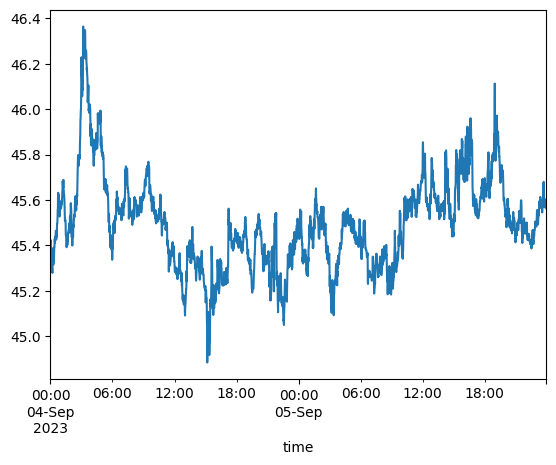

In [77]:
(df_prices * var_eigen_vecs[:,0]).sum(axis=1).plot()

<Axes: xlabel='time'>

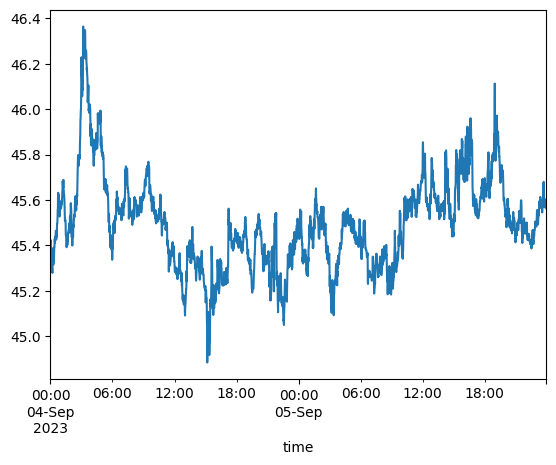

In [60]:
(df_prices * var_eigen_vecs[:,0]).sum(axis=1).plot()

<Axes: xlabel='time'>

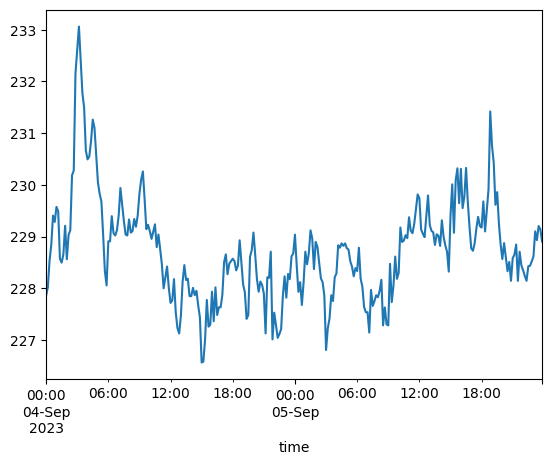

In [79]:
(df_prices_resampled * wgts[:,0]).sum(axis=1).plot()

## Bollinger bands trading

In [81]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 2.0)
values = algo.statarbitrage.bband.add_features(df_prices_resampled, var_eigen_vecs[:,0], bband_trading_param)

<Axes: xlabel='time'>

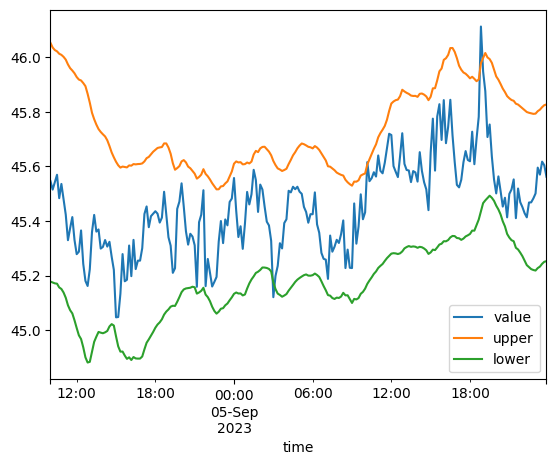

In [82]:
values[['value', 'upper', 'lower']].plot()

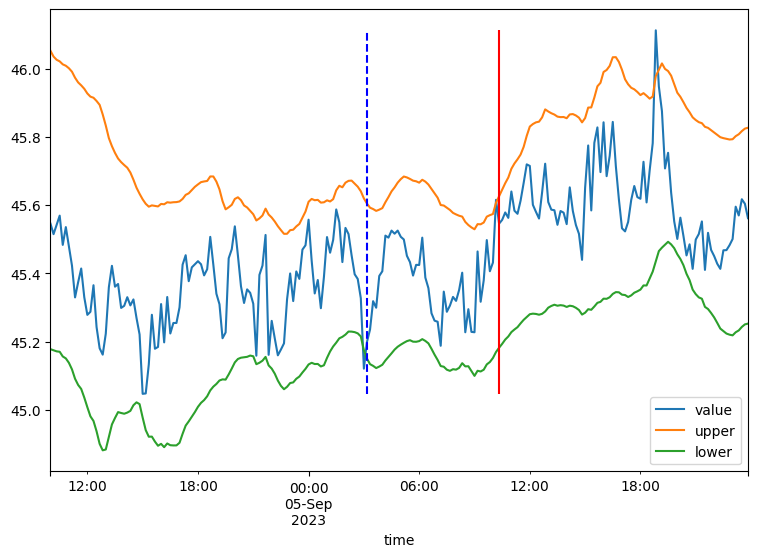

In [83]:
ax = values[['value', 'upper', 'lower']].dropna().plot(figsize=(9, 6))
ymin, ymax = values.value.min(), values.value.max()

# add vertical lines
ax.vlines(x=list(values[values.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values[values.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

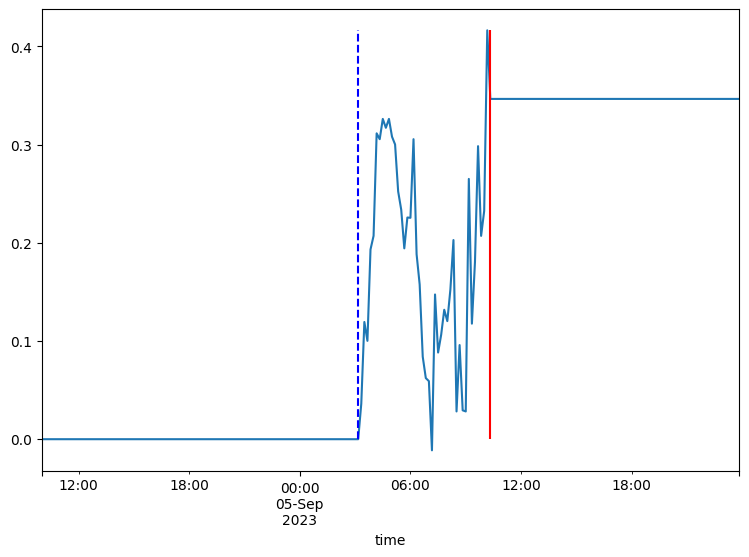

In [84]:
ax = values.profit_raw.cumsum().iloc[:,].plot(figsize=(9, 6))
ymin, ymax = 0, values.profit_raw.cumsum().max()

# add vertical lines
ax.vlines(x=list(values[values.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values[values.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

<Axes: xlabel='time'>

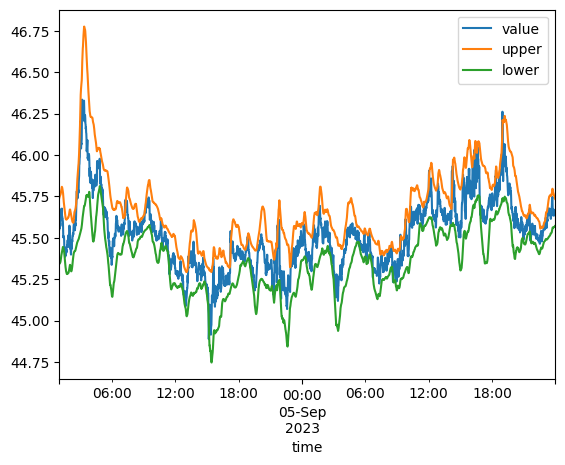

In [33]:
values[['value', 'upper', 'lower']].plot()

<Axes: xlabel='time'>

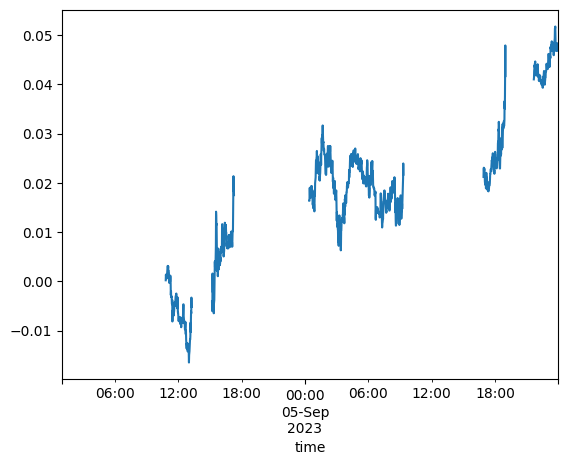

In [34]:
(values.profit_raw / values.position_size).cumsum().plot()

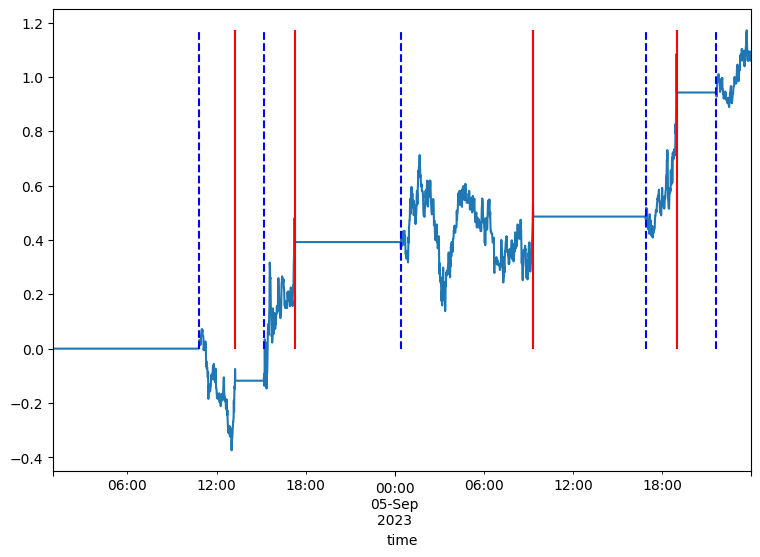

In [35]:
ax = values.profit_raw.cumsum().iloc[:,].plot(figsize=(9, 6))
ymin, ymax = 0, values.profit_raw.cumsum().max()

# add vertical lines
ax.vlines(x=list(values[values.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values[values.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()

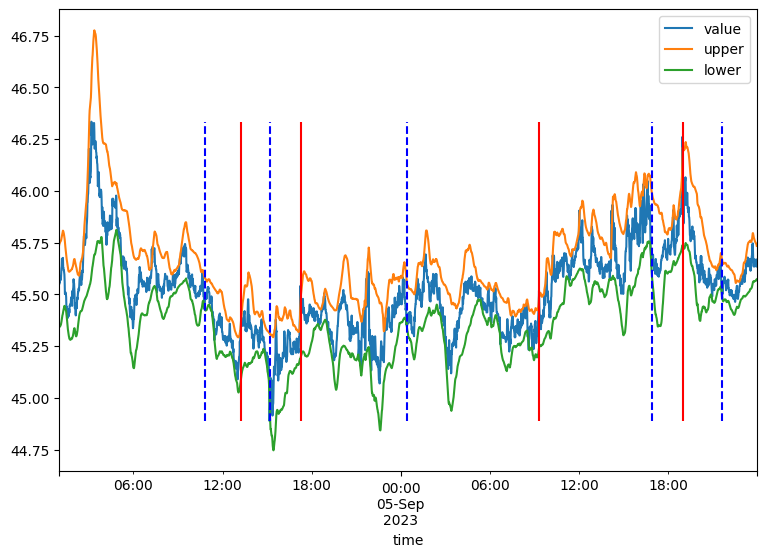

In [36]:
ax = values[['value', 'upper', 'lower']].dropna().plot(figsize=(9, 6))
ymin, ymax = values.value.min(), values.value.max()

# add vertical lines
ax.vlines(x=list(values[values.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
ax.vlines(x=list(values[values.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')

plt.show()